In [1]:
## import helpers
from helpers import data_loaders as dls
from helpers.viz import plot
import utils

Using TensorFlow backend.


In [2]:
import numpy as np
import cv2
from glob import glob
import os
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
limit_index = 3
show_axis=False

In [4]:
img2_path = "../dataset/KITTI/dataset/data_road/training/image_2/umm_000035.png"
gt_path = "../dataset/KITTI/dataset/data_road/training/gt_image_2/umm_road_000035.png"
gt_bev_path = "../dataset/KITTI/dataset/data_road/training/gt_bev/umm_road_000035.png"
calib_path = "../dataset/KITTI/dataset/data_road/training/calib/umm_000035.txt"

In [5]:
img2 = cv2.cvtColor(cv2.imread(img2_path), cv2.COLOR_BGR2RGB)
gt = cv2.cvtColor(cv2.imread(gt_path), cv2.COLOR_BGR2RGB)
gt_bev = cv2.cvtColor(cv2.imread(gt_bev_path), cv2.COLOR_BGR2RGB)

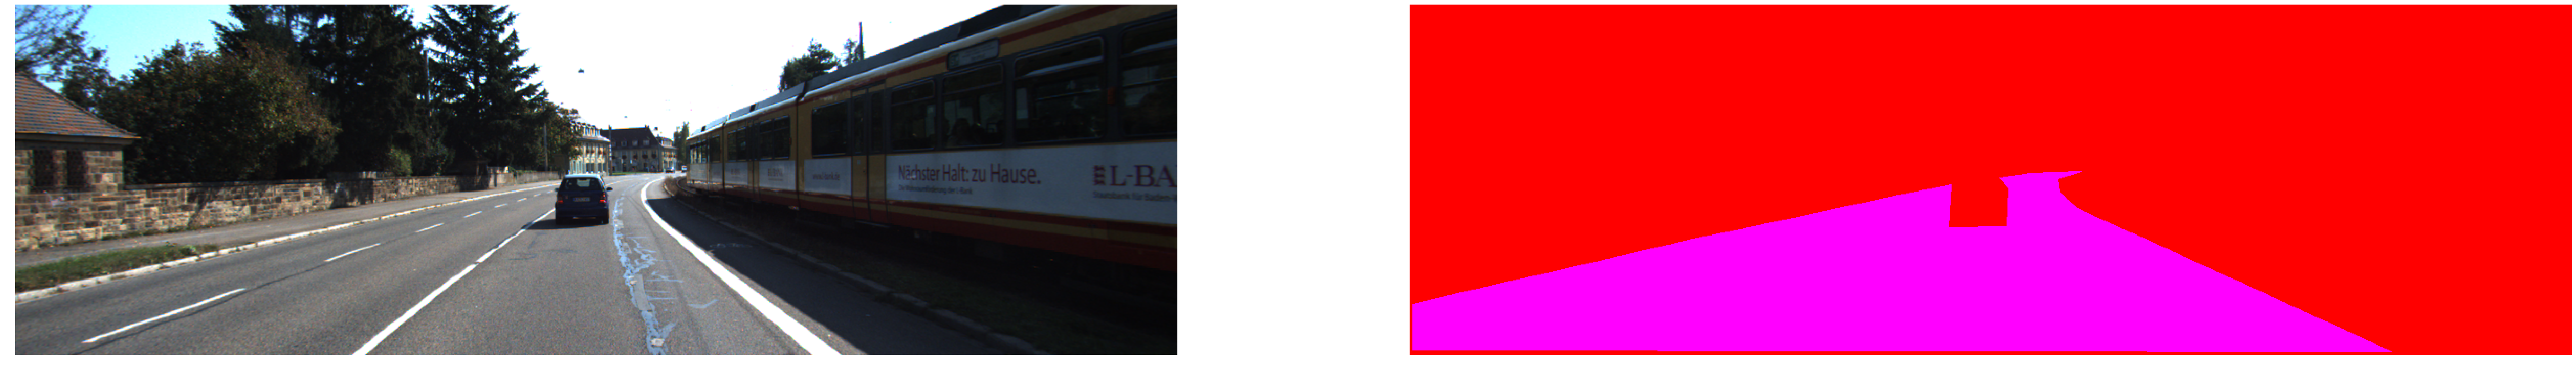

In [6]:
_ =plot([[img2, gt]], figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/image2gt.png")

In [7]:
pc_path = "../dataset/KITTI/dataset/data_road_velodyne/training/velodyne/umm_000035.bin"
pc = dls.load_bin_file(pc_path)

In [8]:
KPC = utils.KittiPointCloudClass(dataset_path='../', 
                                     add_geometrical_features=True,
                                     subsample=False,
                                     compute_HOG=True)
_ = KPC.get_dataset(limit_index = limit_index)
img =  dls.load_img([img2_path])[0]
calib = dls.process_calib([calib_path])[0]
f = KPC.get_features(raw_info=(pc, img, calib)) 

100%|██████████| 3/3 [00:00<00:00, 797.95it/s]

dict_keys(['gt', 'imgs', 'calib', 'lodnn_gt', 'gt_bev', 'pc'])
Reading cloud
Reading calibration files
Reading camera images
nCPUs = 4


(6, 2)
Height ranges from -22.01300048828125 to 2.9130001068115234
Evaluating count
Count varies from 0 to 115
Extracting features
nCPUs = 4
nCPUs = 4
nCPUs = 4
Evaluated in : 19.283228874206543


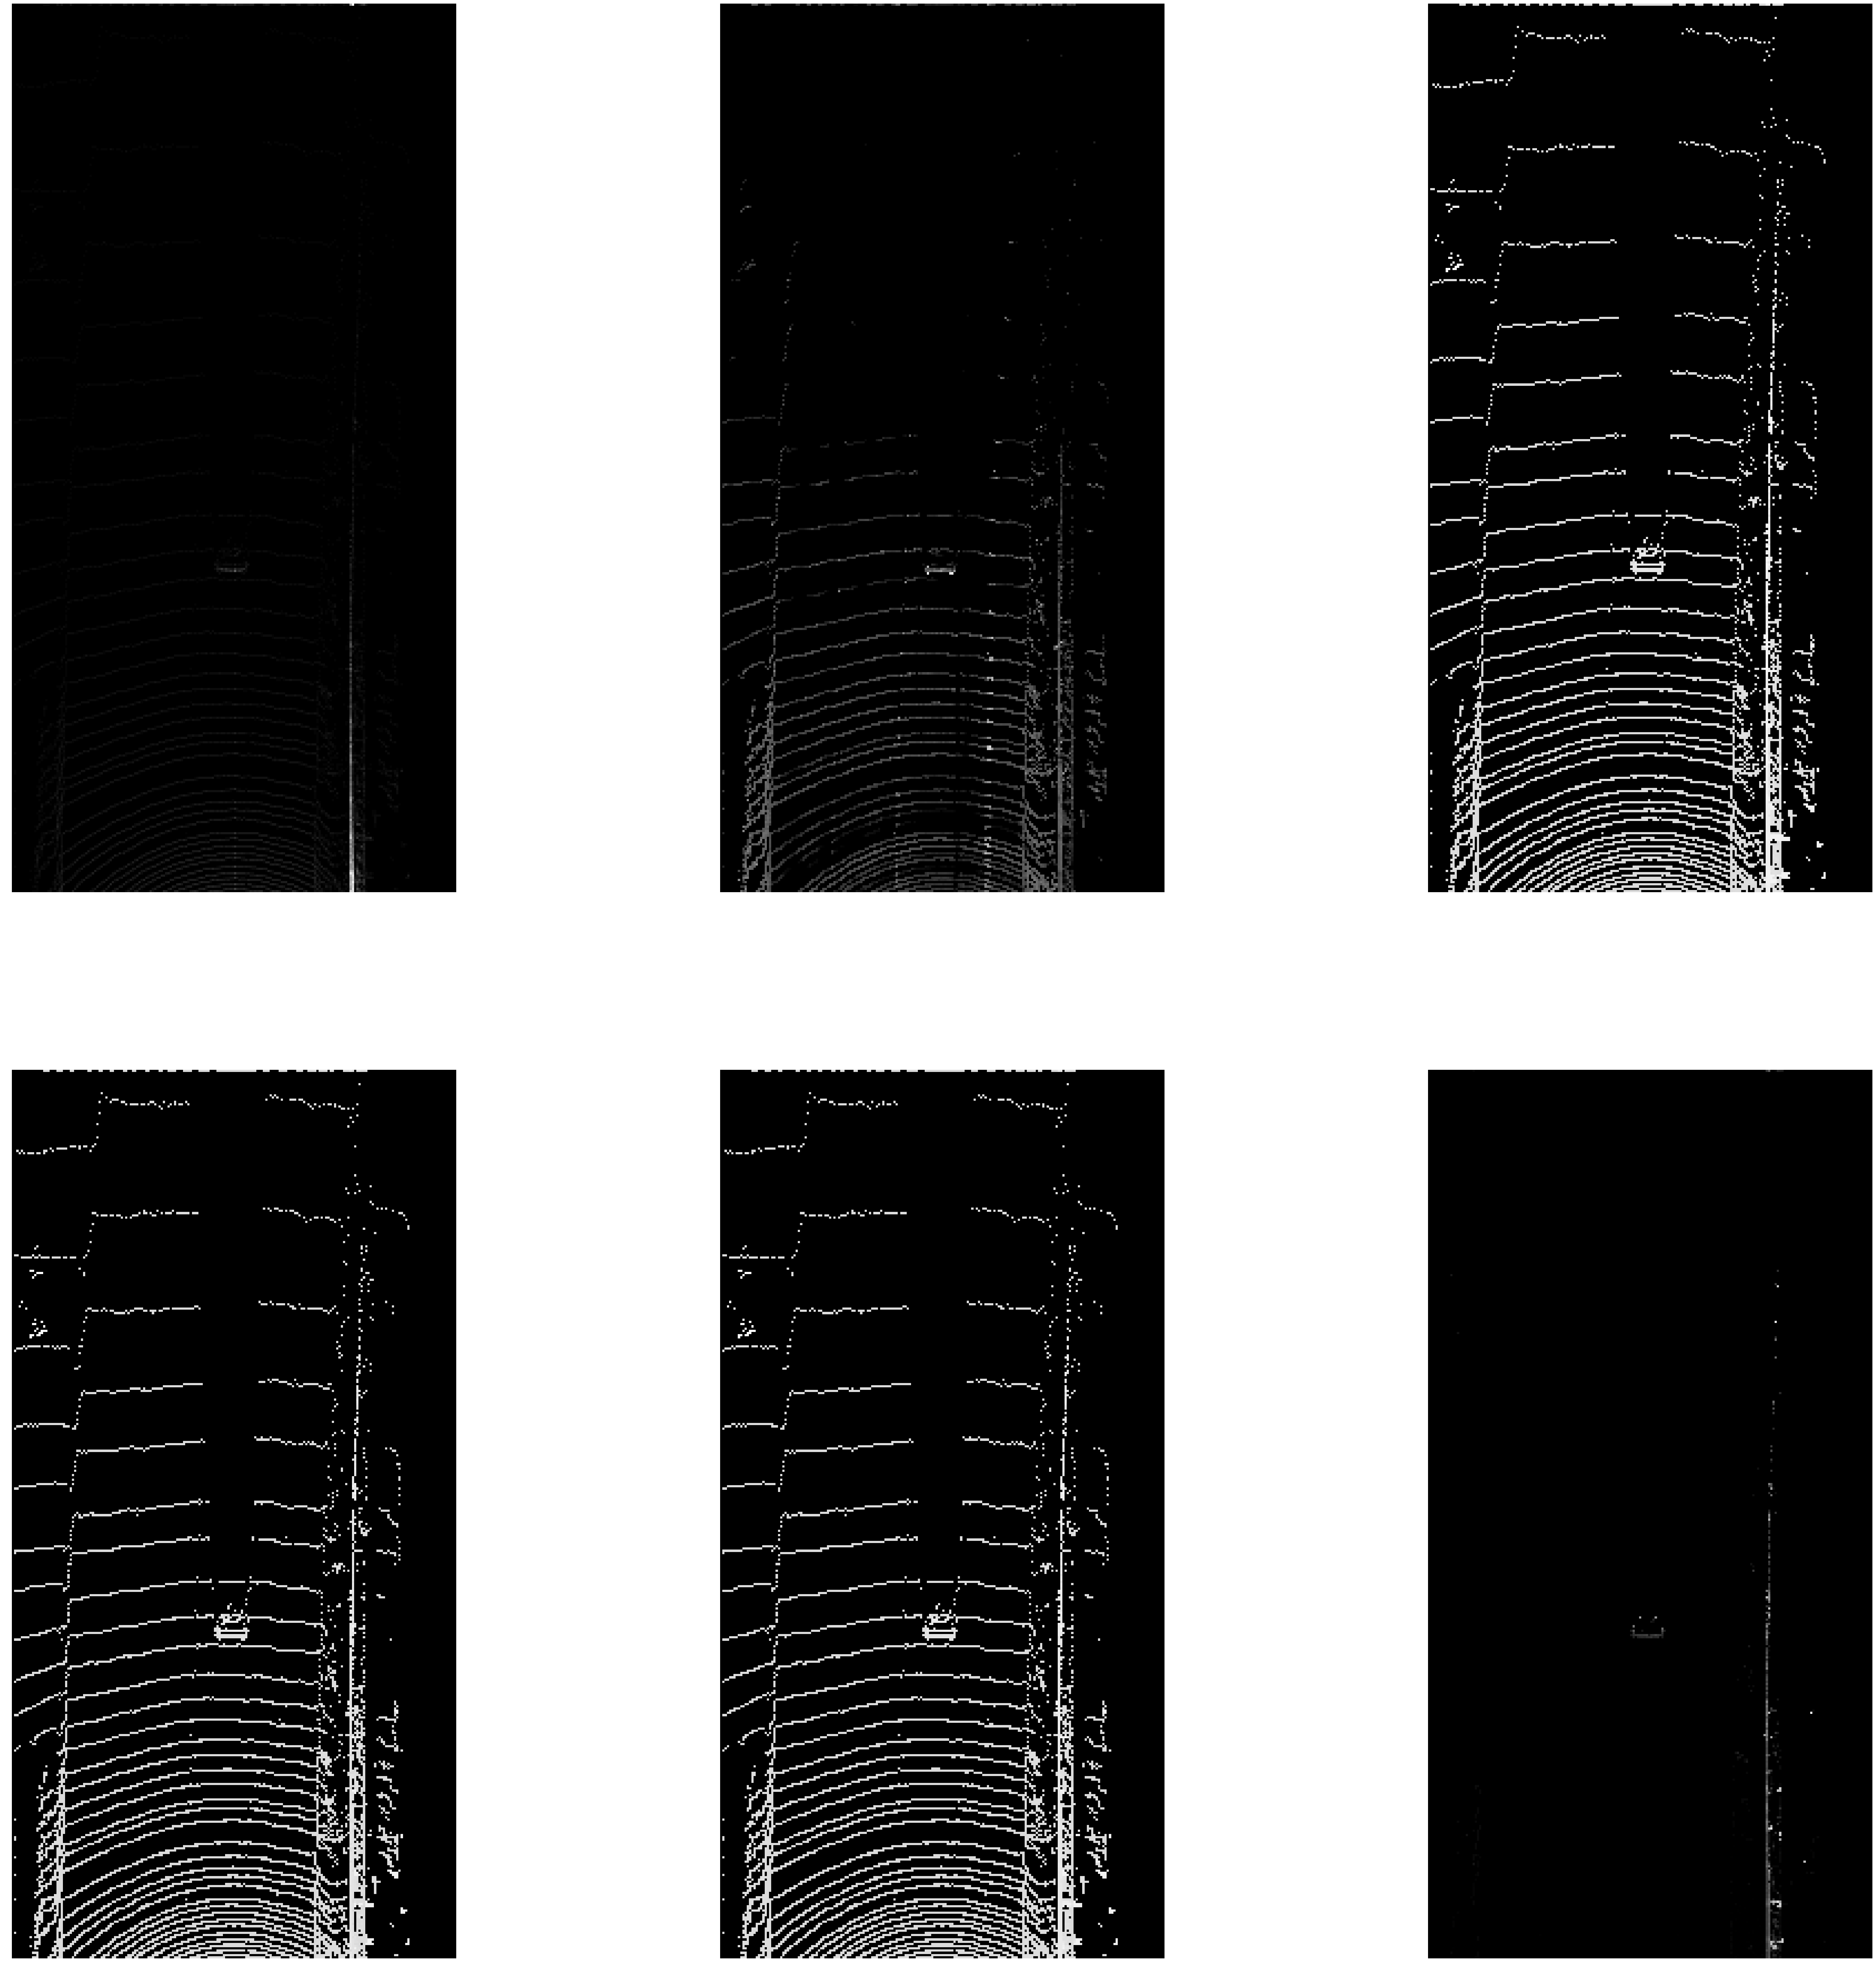

In [9]:
cvt = lambda x : dls.normalize(x, min=np.min(x), max=np.max(x), scale_min=0, scale_max=255, dtype=np.uint8)
_ = plot([[cvt(f[:,:,0]), cvt(f[:,:,1]), cvt(f[:,:,2])],
      [cvt(f[:,:,3]), cvt(f[:,:,4]), cvt(f[:,:,5])]],
    figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/classical.png")

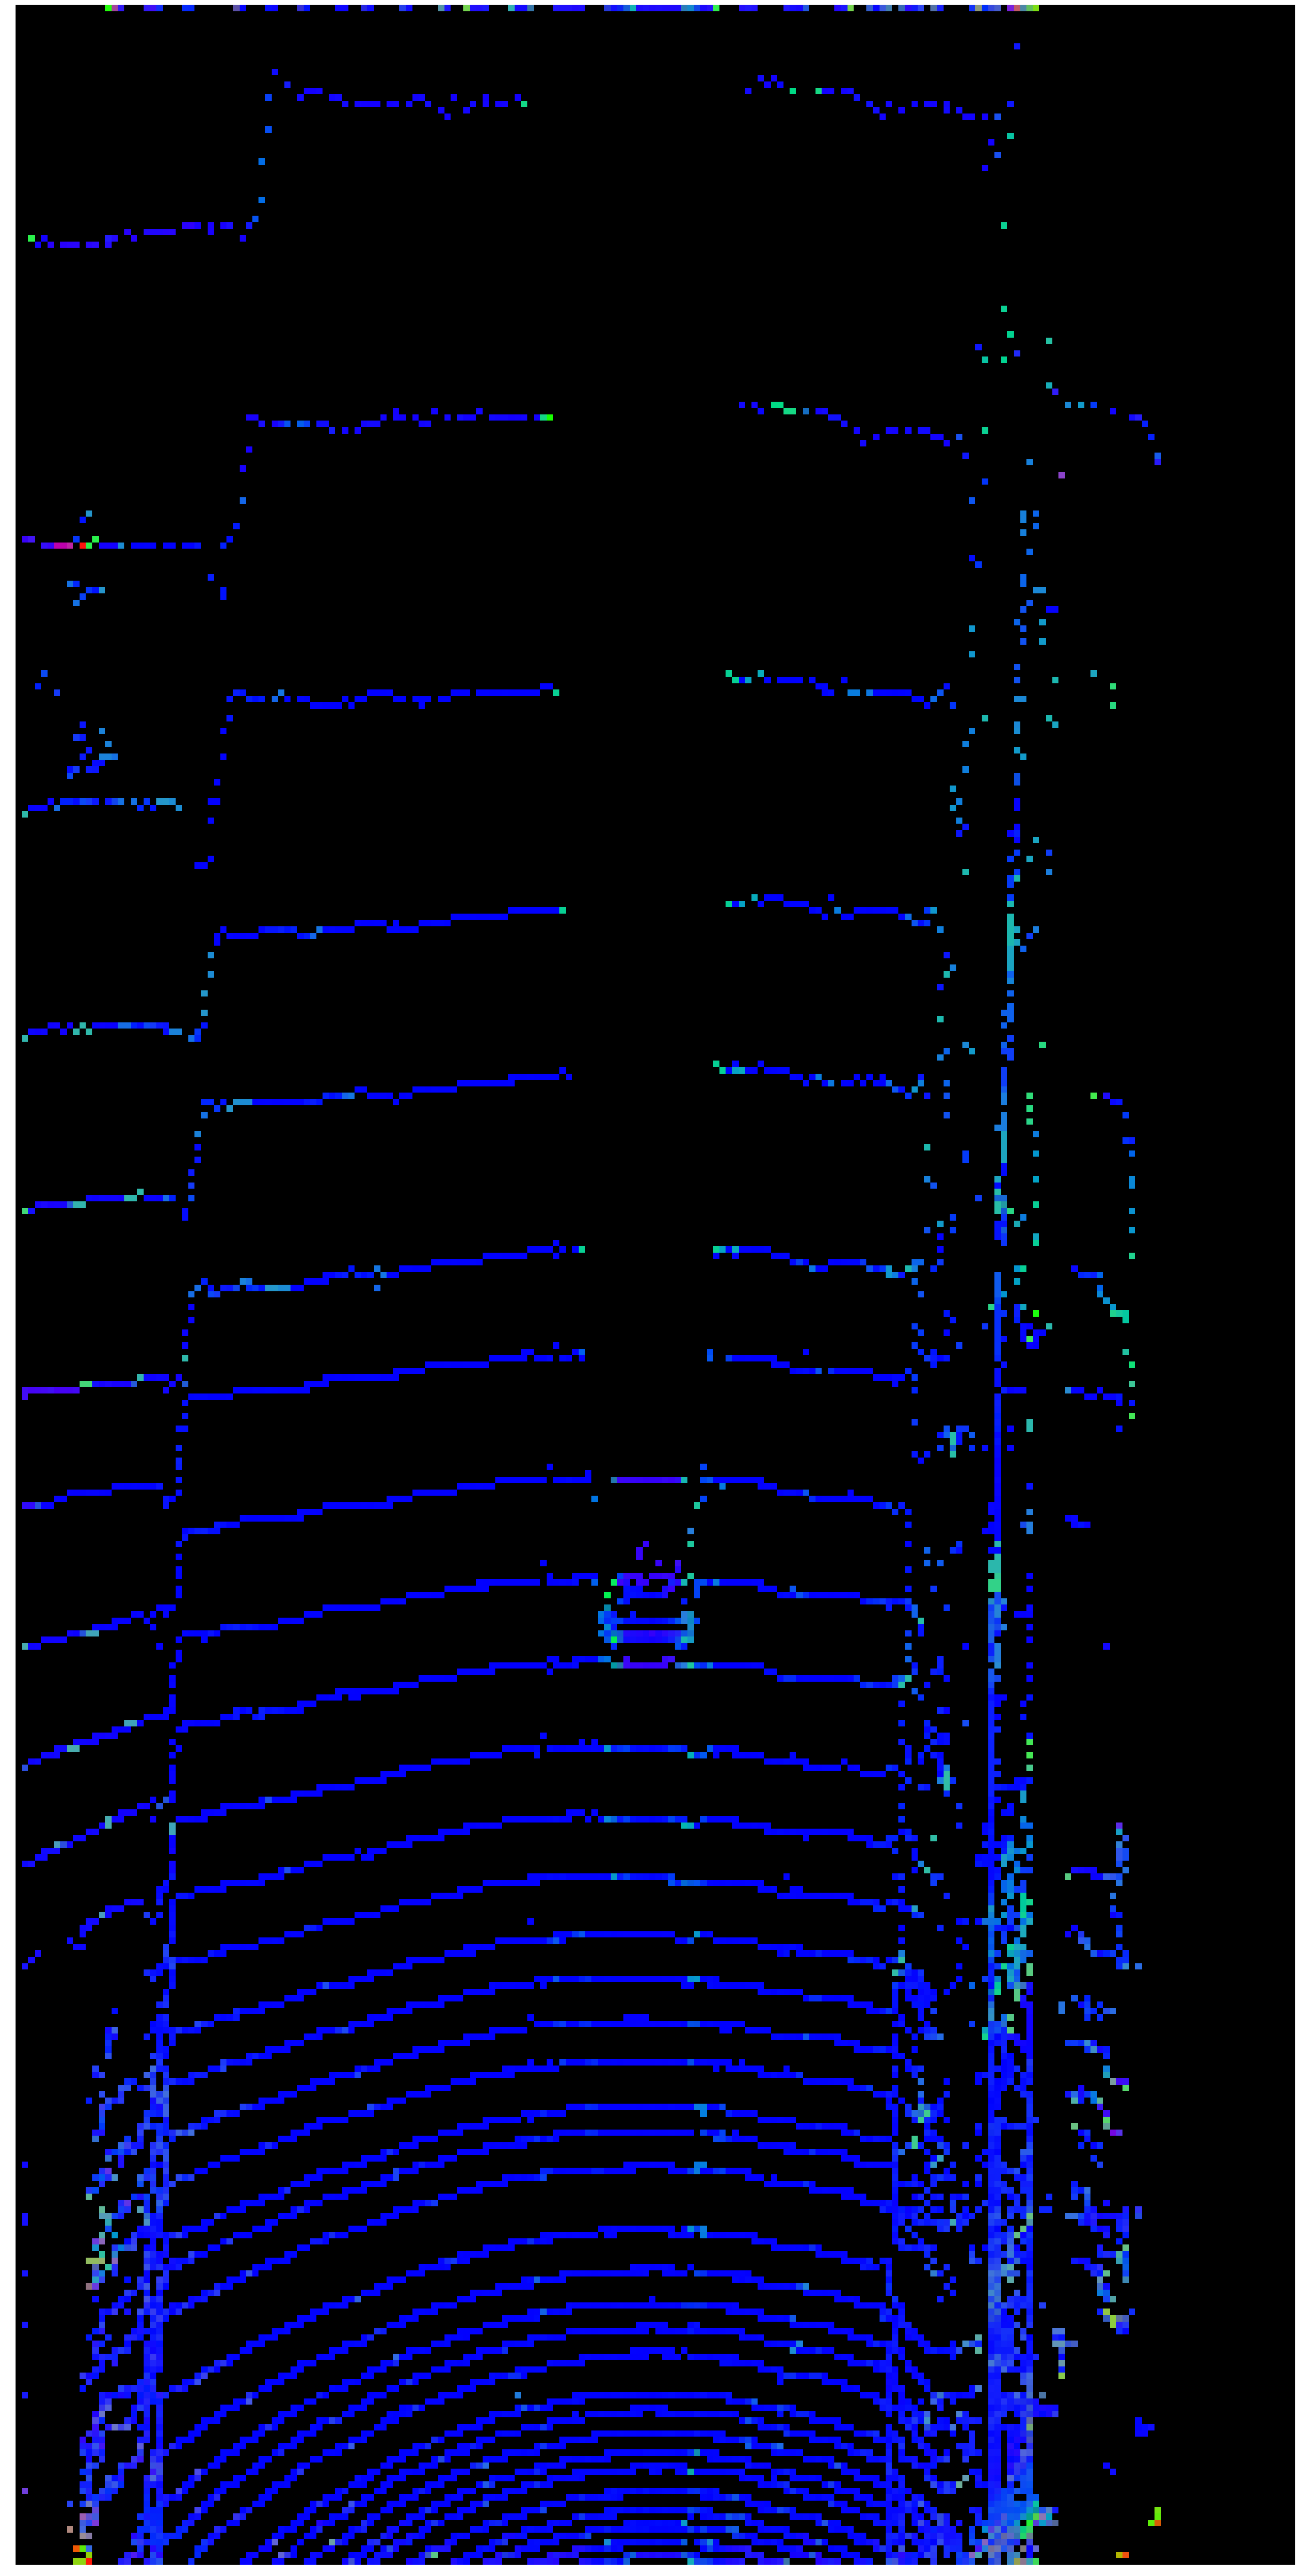

In [10]:
_f = np.abs(f)
R, G, B = cvt(_f[:,:,6]), cvt(_f[:,:,7]), cvt(_f[:,:,8])
normals_bev = np.dstack([R,G,B])
_ = plot([[normals_bev]], figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/geometrical_features.png")

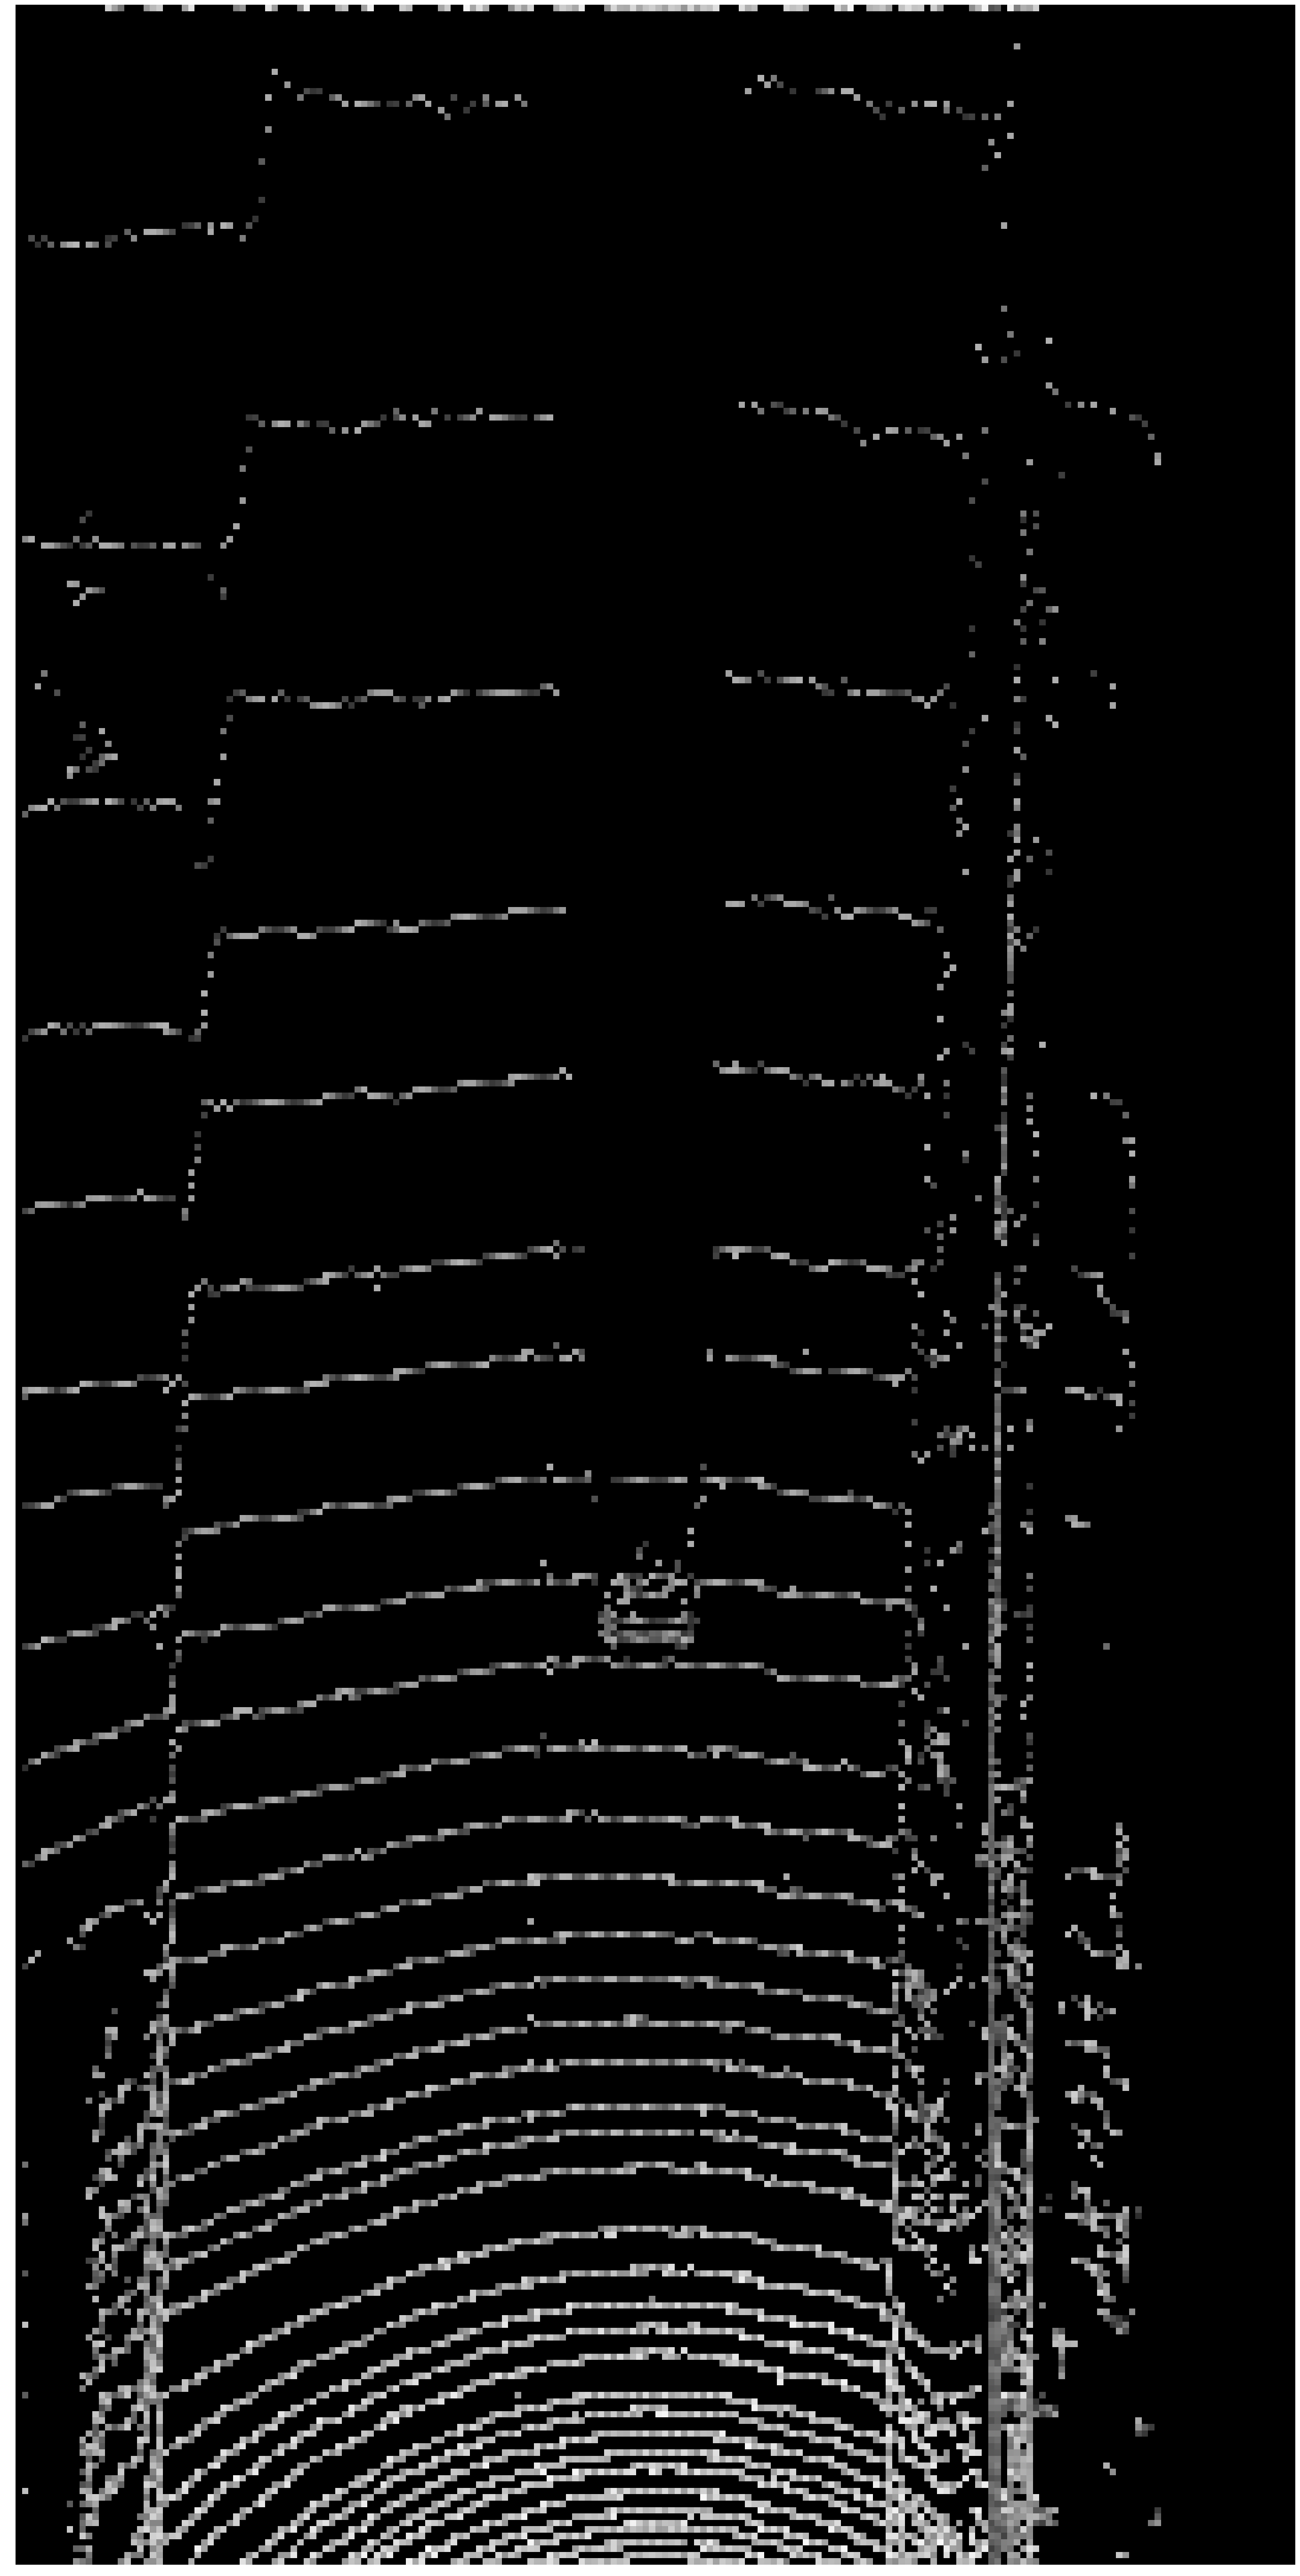

In [11]:
normalize = lambda x : dls.normalize(x, min=np.min(x), max=np.max(x), scale_min=0, scale_max=1, dtype=np.float32)
_sum = np.square(normalize(f[:,:,6]))
for i in range(7, 12):
    _sum  = _sum + np.square(normalize(f[:,:,i]))
hog = np.sqrt(_sum)
plot([[hog]], figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/hog_features.png")

In [12]:
KPC = utils.KittiPointCloudClass(dataset_path='../', 
                                     add_geometrical_features=True,
                                     subsample=True,
                                     compute_HOG=True)
_ = KPC.get_dataset(limit_index = limit_index)
img =  dls.load_img([img2_path])[0]
calib = dls.process_calib([calib_path])[0]
_pc = KPC.subsample_pc(pc)
f = KPC.get_features(raw_info=(_pc, img, calib)) 


 33%|███▎      | 1/3 [00:00<00:00,  6.18it/s]

dict_keys(['gt', 'imgs', 'calib', 'lodnn_gt', 'gt_bev', 'pc'])
Reading cloud


100%|██████████| 3/3 [00:00<00:00, 20.75it/s]


Reading calibration files
Reading camera images
nCPUs = 4
(6, 2)
Height ranges from -22.01300048828125 to 2.9130001068115234
Read and Subsample cloud
nCPUs = 4
nCPUs = 4
nCPUs = 4
Evaluated in : 0.7934253215789795
Evaluating count
Count varies from 0 to 52
Extracting features
nCPUs = 4
nCPUs = 4
nCPUs = 4
Evaluated in : 10.460535049438477


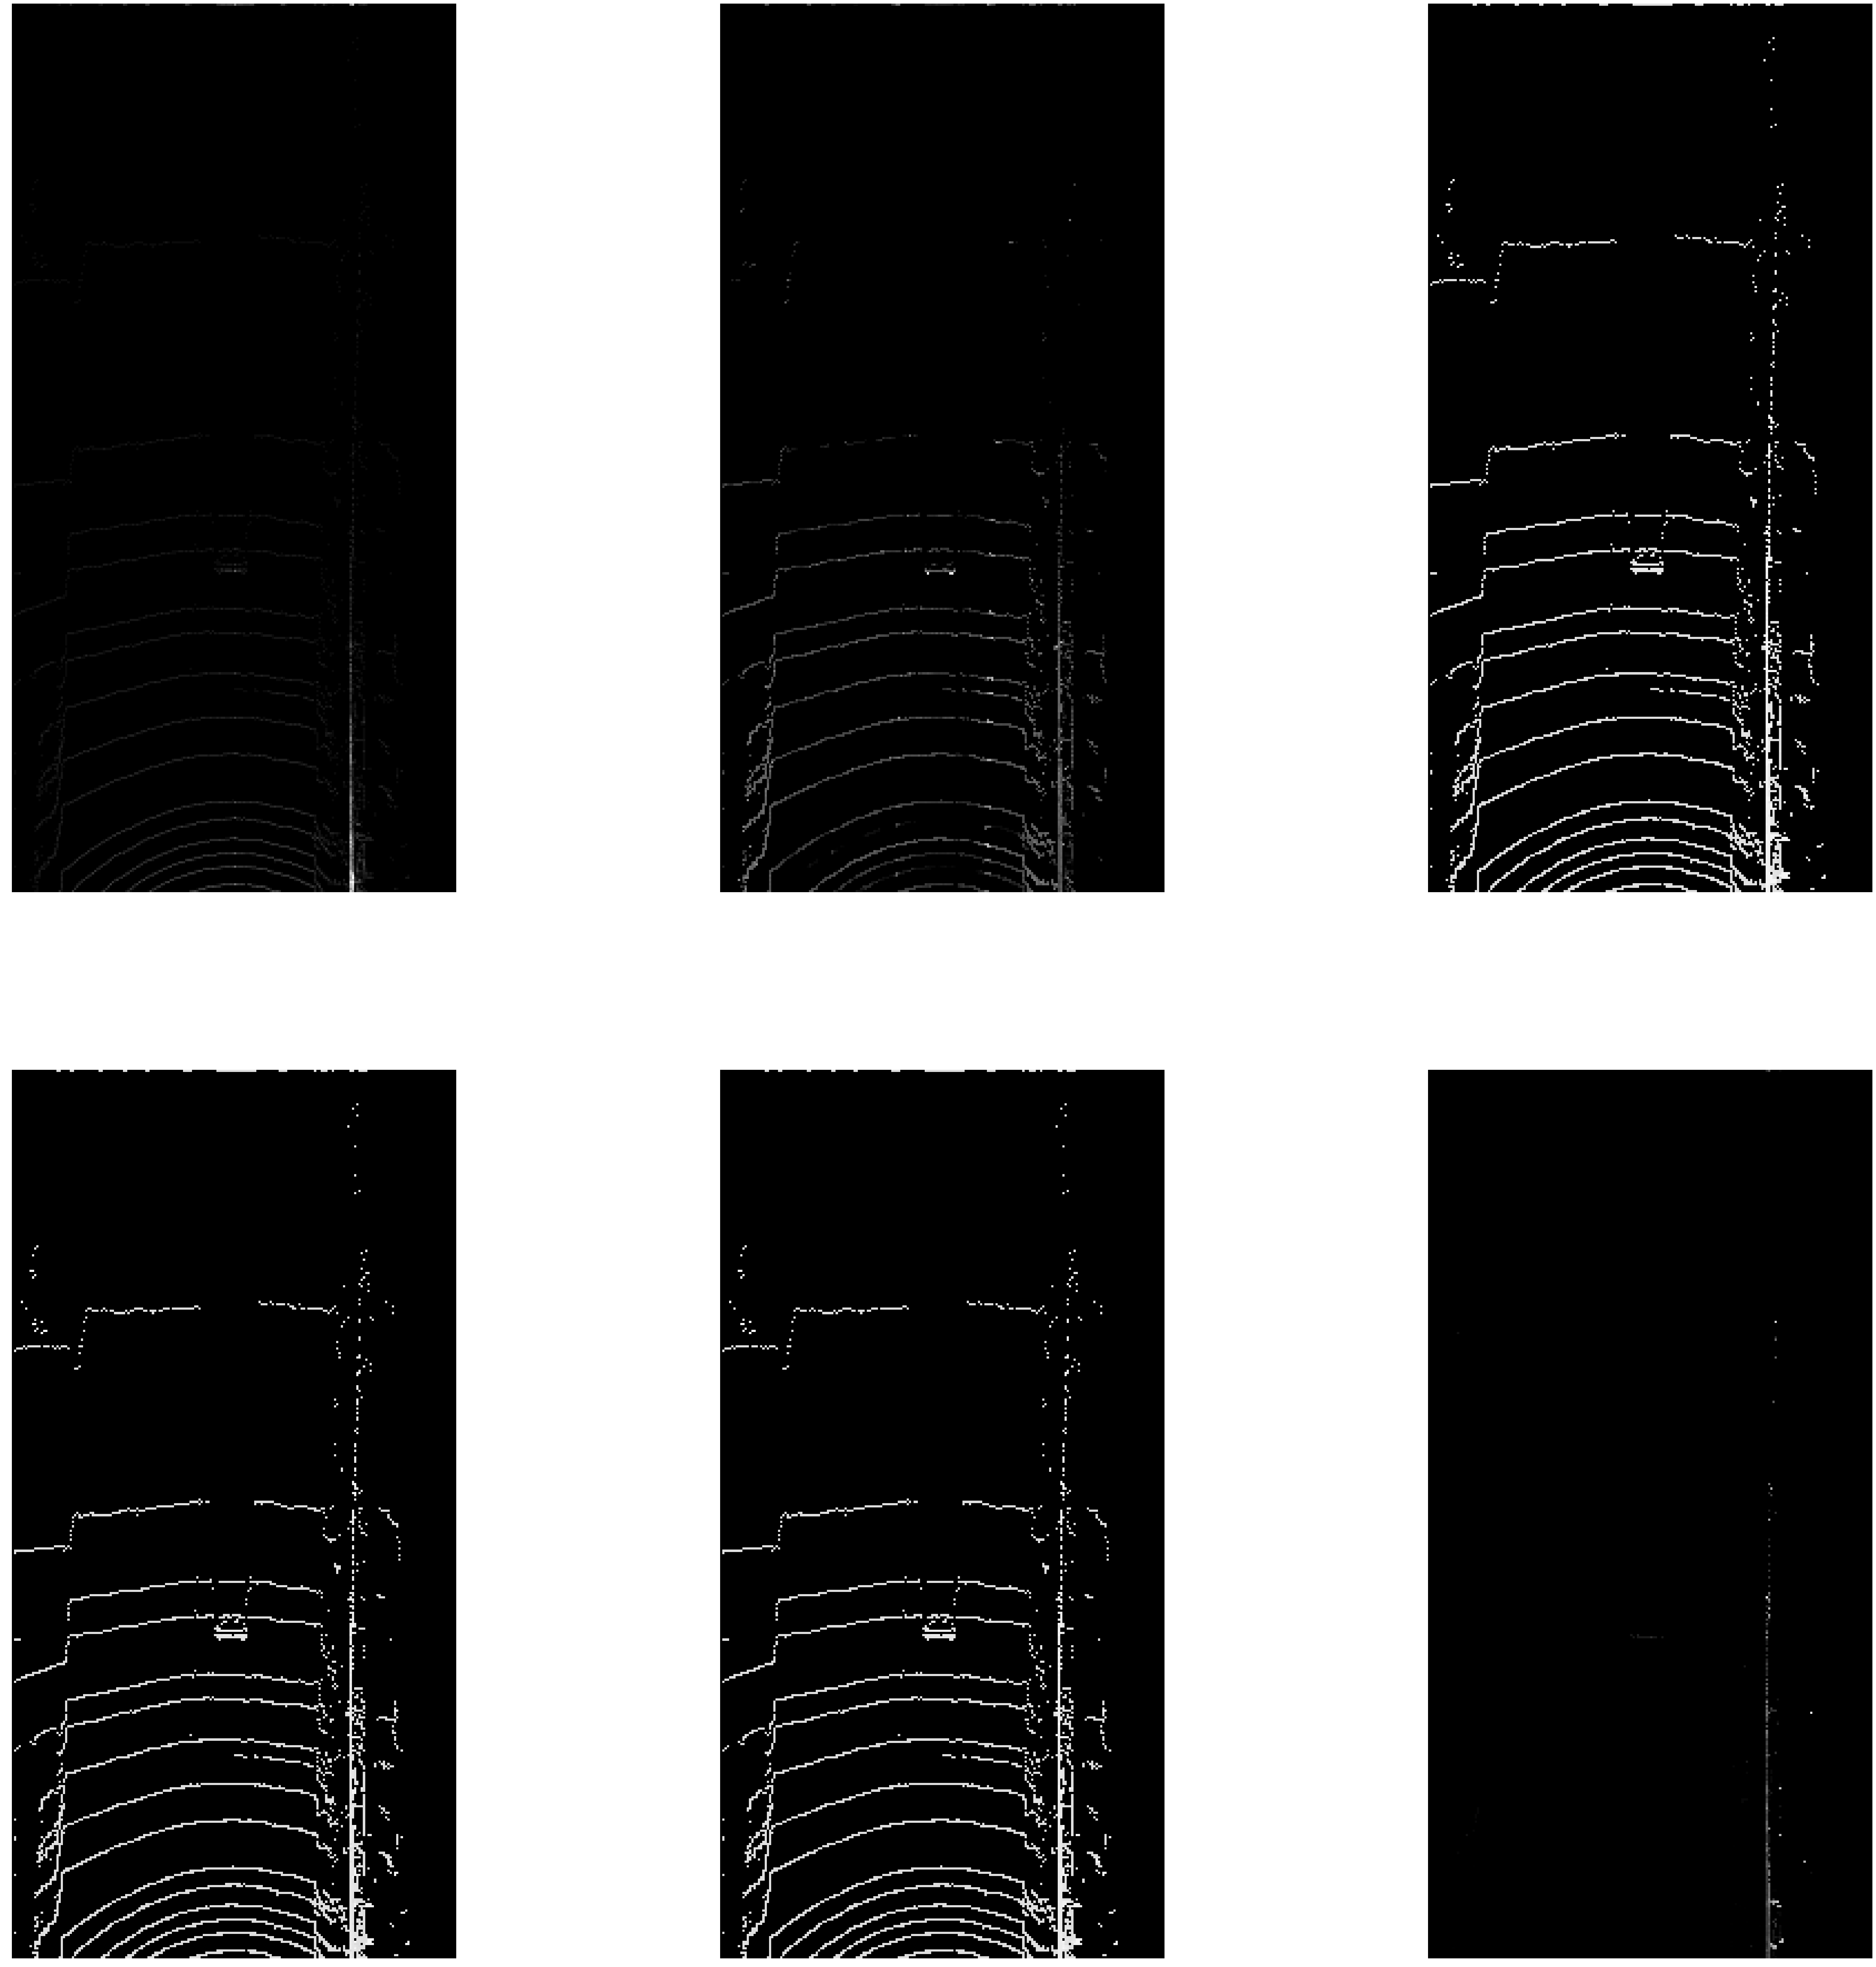

In [13]:
_ = plot([[cvt(f[:,:,0]), cvt(f[:,:,1]), cvt(f[:,:,2])],
      [cvt(f[:,:,3]), cvt(f[:,:,4]), cvt(f[:,:,5])]],
    figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/subsampled_classical.png")

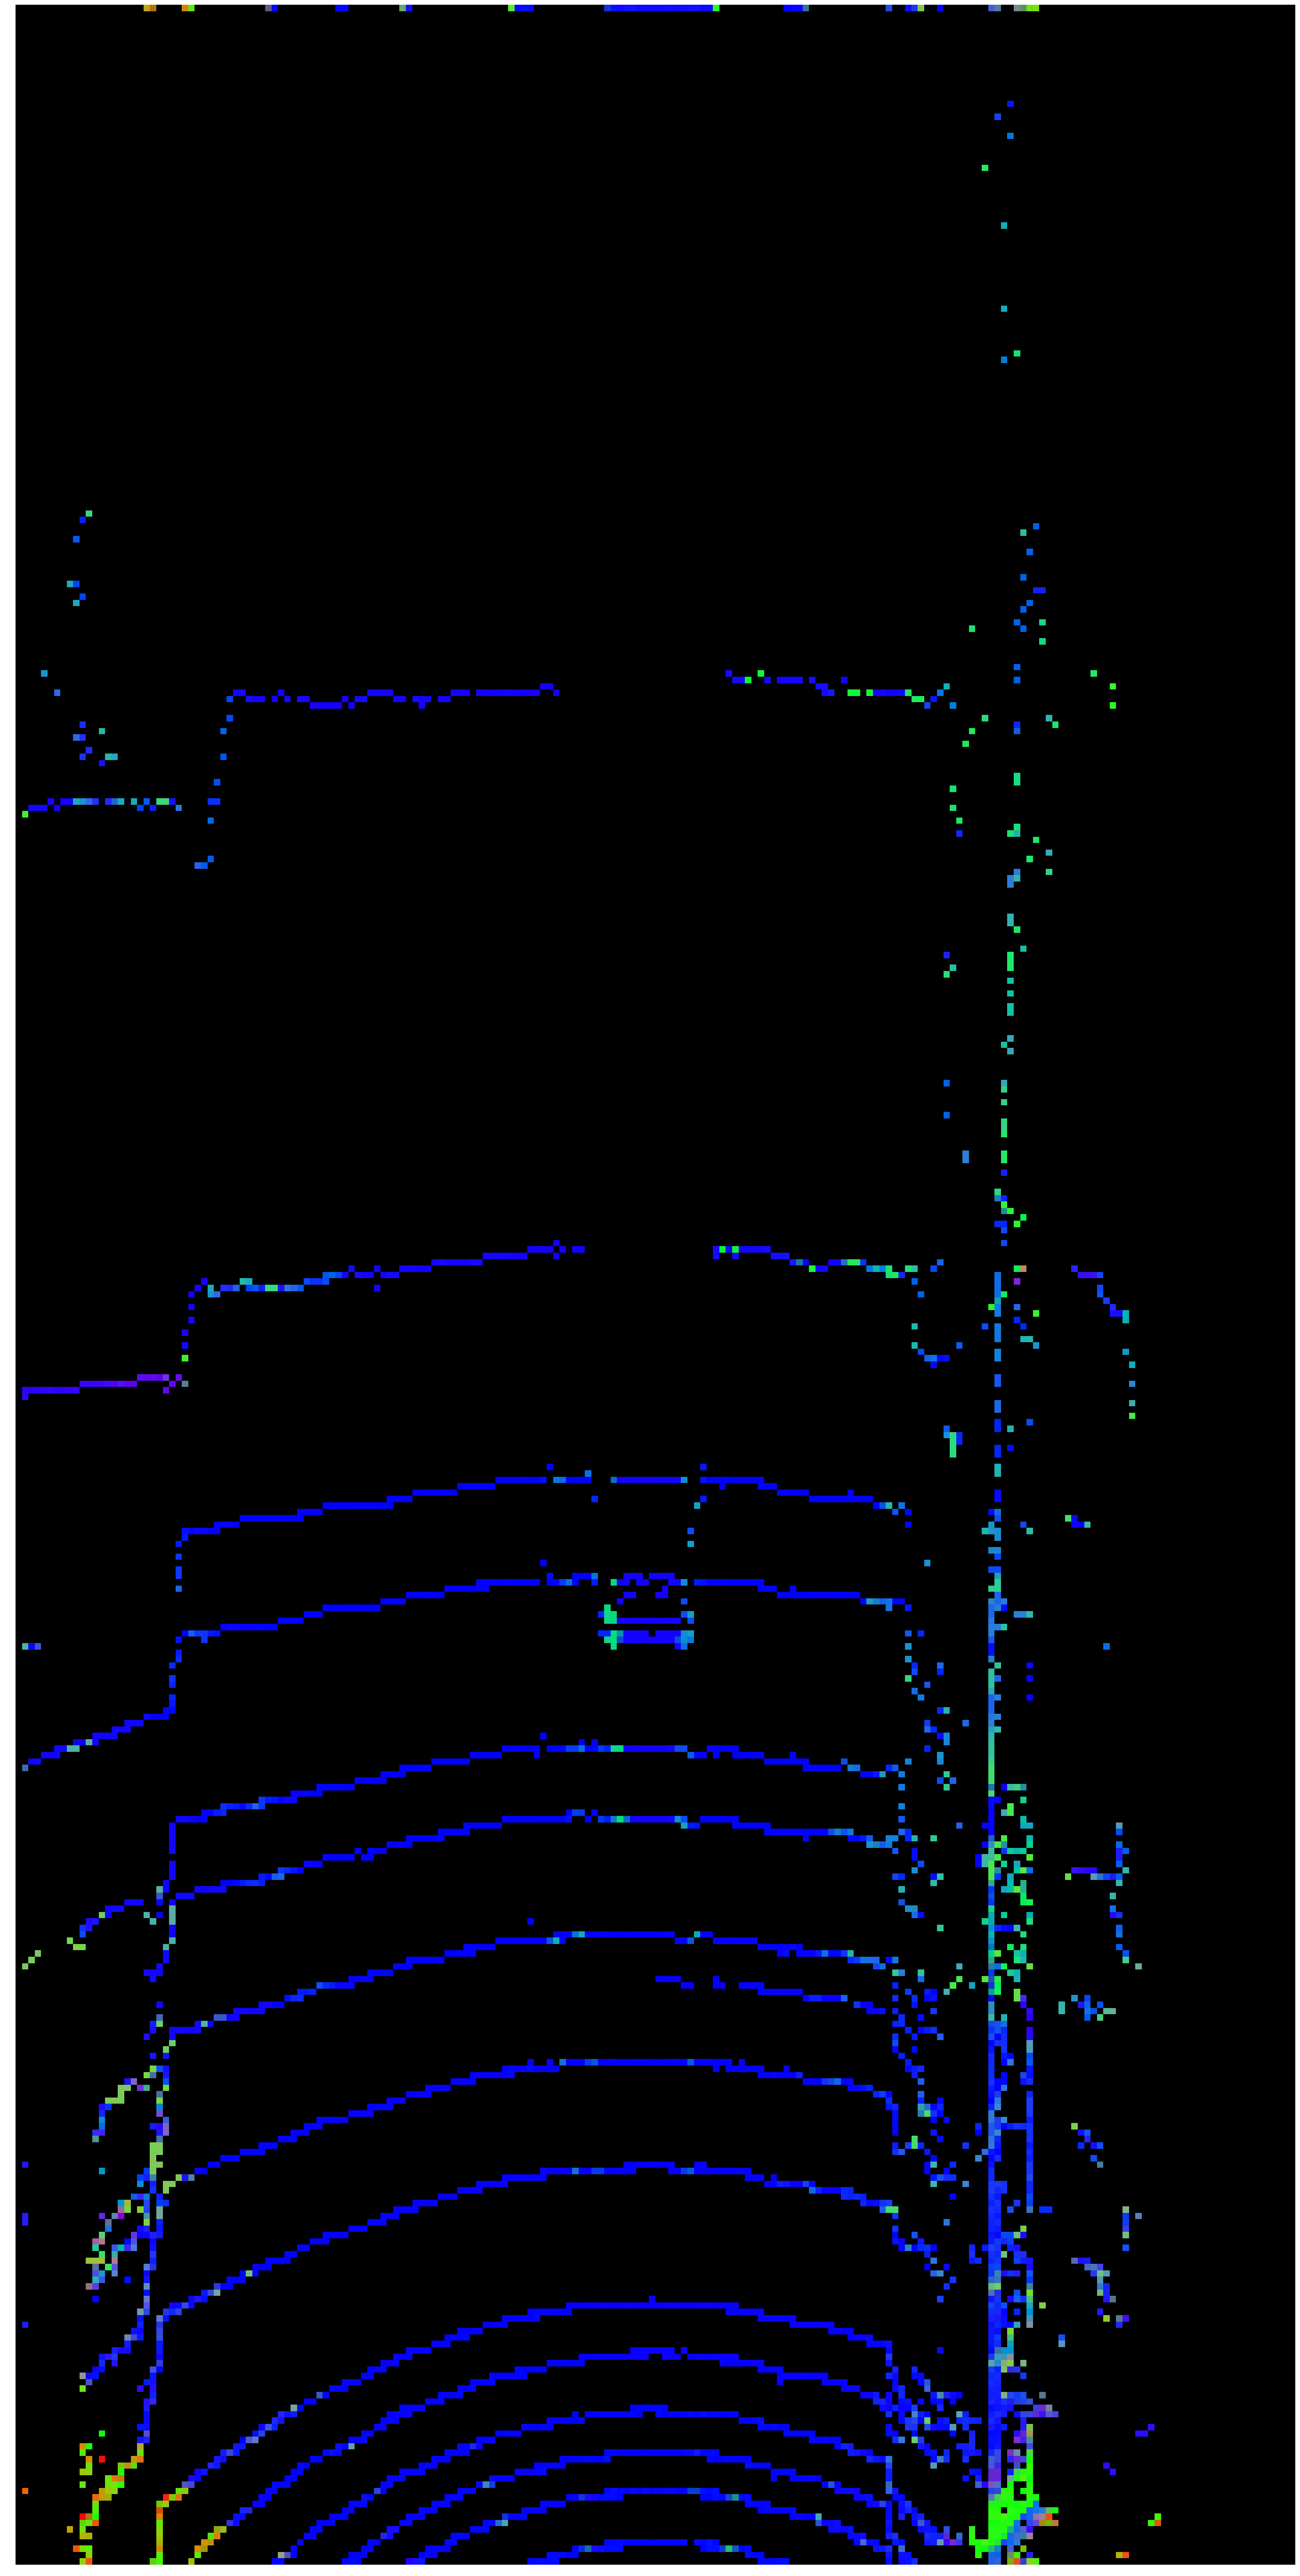

In [14]:
_f = np.abs(f)
R, G, B = cvt(_f[:,:,6]), cvt(_f[:,:,7]), cvt(_f[:,:,8])
normals_bev = np.dstack([R,G,B])
_ = plot([[normals_bev]], figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/subsampled_geometrical_features.png")

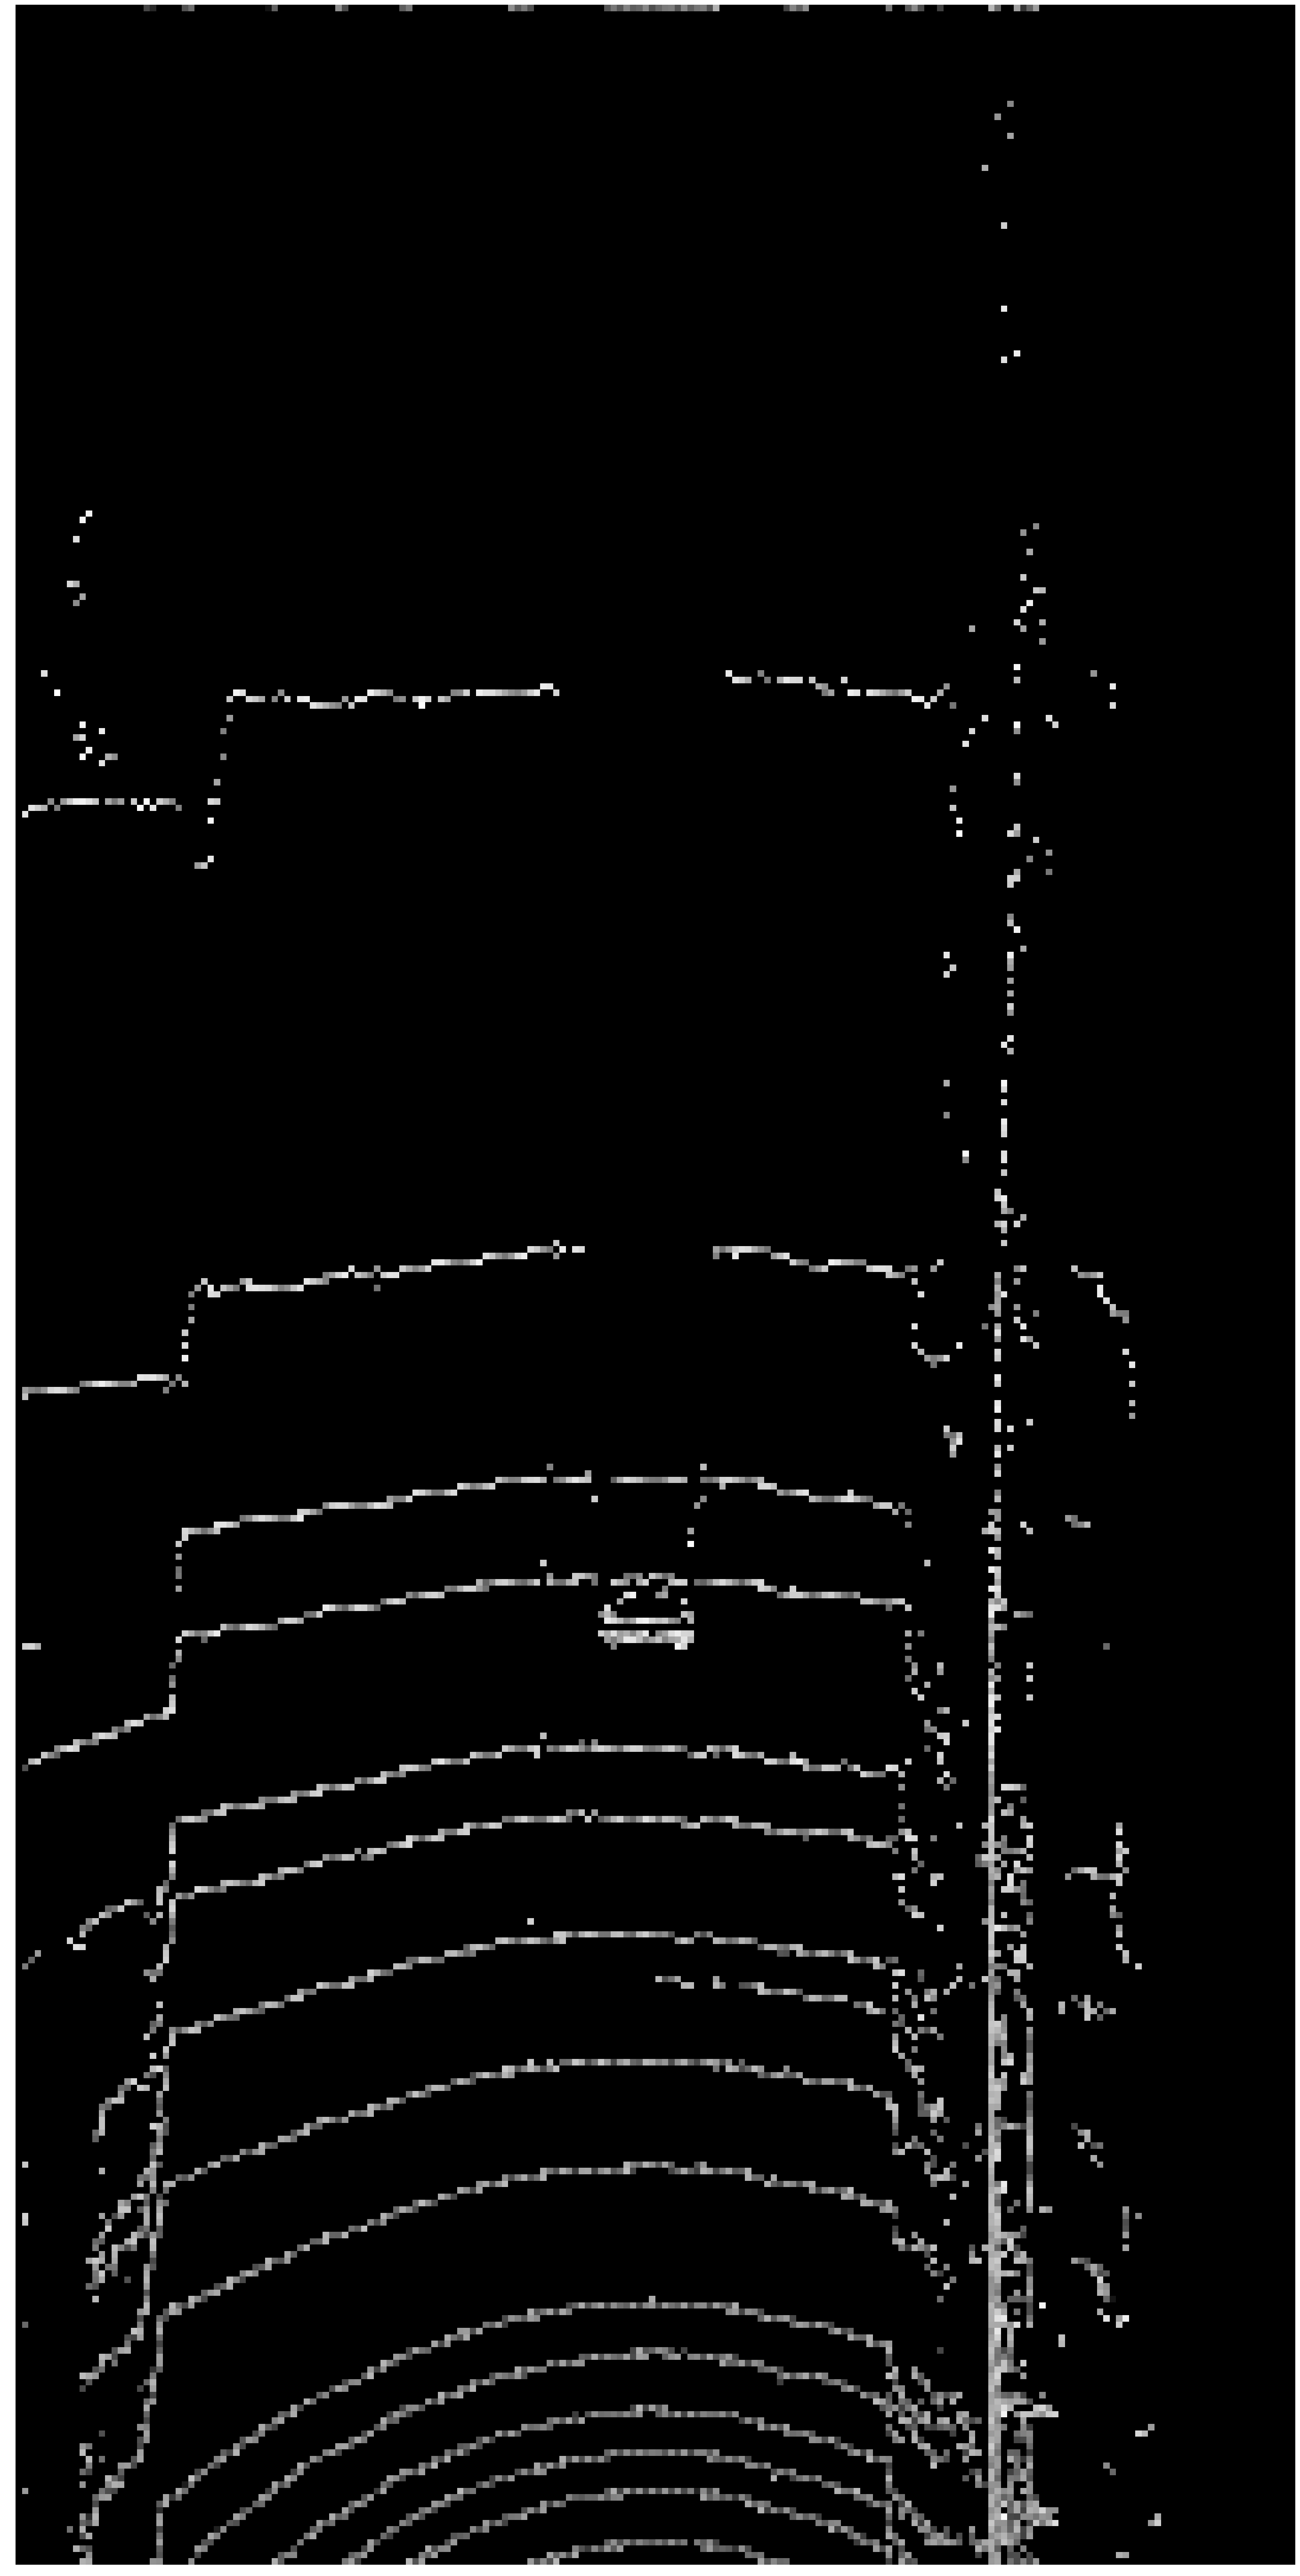

In [15]:
_sum = np.square(normalize(f[:,:,6]))
for i in range(7, 12):
    _sum  = _sum + np.square(normalize(f[:,:,i]))
hog = np.sqrt(_sum)
plot([[hog]], figsize=(100, 100), show_axis=show_axis)
plt.savefig("features_viz/subsampled_hog_features.png")